## 2.LOAD THE DATASET

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.Perform Below visualizations

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

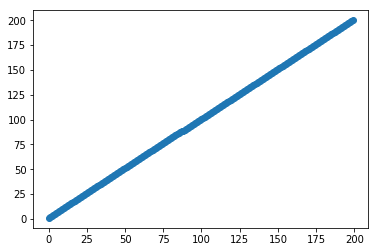

In [5]:
plt.scatter(data.index,data['CustomerID'])
plt.show()

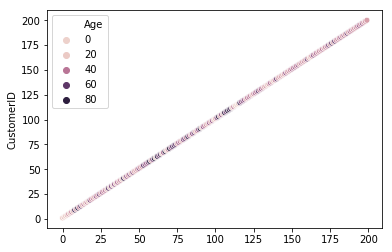

In [6]:
sns.scatterplot(x=data.index,y=data['CustomerID'],hue=data['Age'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

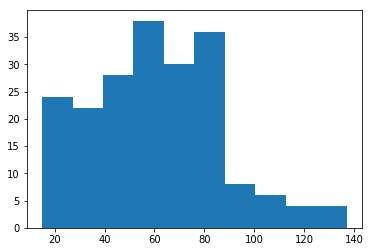

In [7]:
plt.hist(data['Annual Income (k$)'])

##BiVariate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x289ac5dd6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x289ac5ddd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x289ac5dd2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x289ac5e7400>],
 'fliers': [<matplotlib.lines.Line2D at 0x289ac5e7748>],
 'means': []}

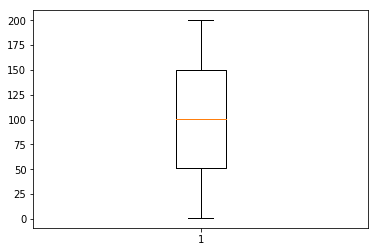

In [9]:
plt.boxplot(data['CustomerID'])

In [10]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


##MultiVariate Analysis 

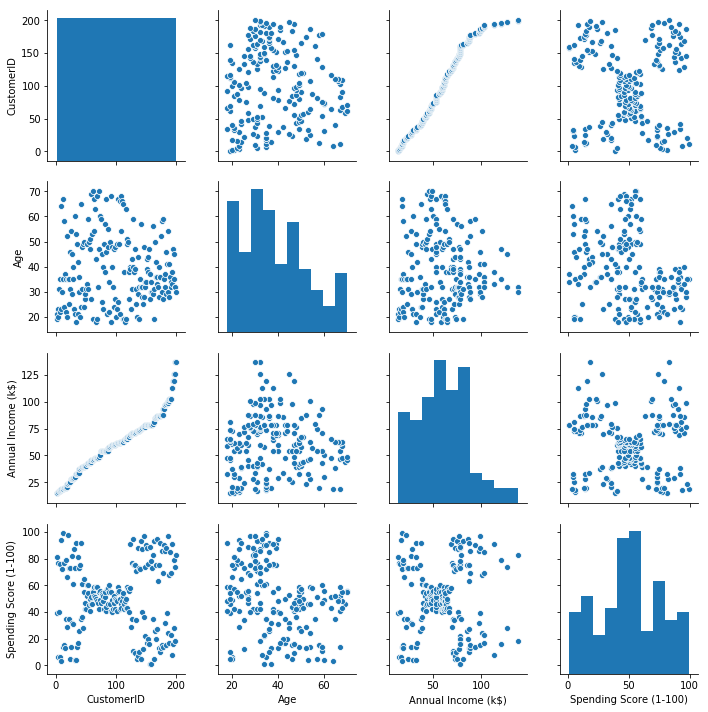

In [11]:
sns.pairplot(data)

## 4.Perform Descriptive statistics on the dataset 

In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 5.HANDLE THE MISSING VALUES 

In [13]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
#No Null values present in this dataset
#incase age,region column has missing values we can us below code:
data['Age'].fillna(data['Age'].mean(),inplace=True)

## 6.FIND THE OUTLIERS AND REPLACE THE OUTLIERS 

In [15]:
import seaborn as sns

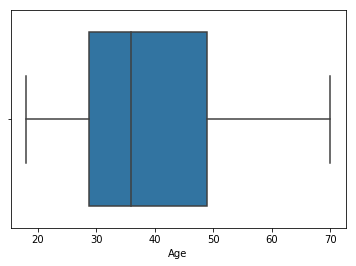

In [16]:
sns.boxplot(data.Age)

In [18]:
perc99=data.Age.quantile(0.99)
perc99

69.00999999999999

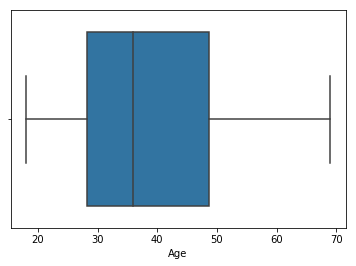

In [19]:
##If outlier is present
data=data[data.Age<=perc99]
sns.boxplot(data.Age)

## 7.CHECK THE CATEGORICAL COLUMN AND PERFORM ENCODING 

In [20]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
data.Gender=le.fit_transform(data.Gender)

C:\Users\sajus\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


##  8. Scaling the data 

In [24]:
##Standization

In [28]:
x=data[['Annual Income (k$)','Spending Score (1-100)']]

In [29]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scale=StandardScaler()

In [32]:
st_scale=scale.fit_transform(x)

In [33]:
st_scale

array([[-1.72395579e+00,  1.14119480e+00, -1.43156122e+00,
        -1.73750289e+00],
       [-1.70669007e+00,  1.14119480e+00, -1.28500014e+00,
        -1.73750289e+00],
       [-1.68942435e+00, -8.76274582e-01, -1.35828068e+00,
        -1.69947640e+00],
       [-1.67215864e+00, -8.76274582e-01, -1.13843907e+00,
        -1.69947640e+00],
       [-1.65489292e+00, -8.76274582e-01, -5.52194762e-01,
        -1.66144992e+00],
       [-1.63762720e+00, -8.76274582e-01, -1.21171960e+00,
        -1.66144992e+00],
       [-1.62036148e+00, -8.76274582e-01, -2.59072609e-01,
        -1.62342344e+00],
       [-1.60309576e+00, -8.76274582e-01, -1.13843907e+00,
        -1.62342344e+00],
       [-1.58583005e+00,  1.14119480e+00,  1.86606300e+00,
        -1.58539696e+00],
       [-1.56856433e+00, -8.76274582e-01, -6.25475300e-01,
        -1.58539696e+00],
       [-1.55129861e+00,  1.14119480e+00,  2.08590461e+00,
        -1.58539696e+00],
       [-1.53403289e+00, -8.76274582e-01, -2.59072609e-01,
      

In [33]:
##Normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
min_max=MinMaxScaler(feature_range=(0,1))

In [36]:
norm_scal=min_max.fit_transform(x)

In [37]:
norm_scal

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

## 9.Perform any of the clustering algorithms 

In [38]:
from sklearn.cluster import KMeans

In [39]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)   
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\sajus\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'WCSS')

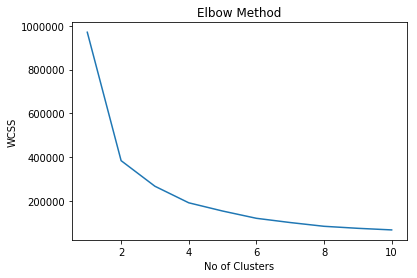

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

In [41]:
km_model=KMeans(n_clusters=3, init='k-means++',random_state=0)

In [42]:
ykmeans=km_model.fit_predict(data)

In [43]:
print(ykmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## 10. ADD CLUSTER DATA WITH MAIN DATASET 

In [45]:
data['Kclus']=pd.Series(ykmeans)

C:\Users\sajus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kclus
0,1,1,19,15,39,2.0
1,2,1,21,15,81,2.0
2,3,0,20,16,6,2.0
3,4,0,23,16,77,2.0
4,5,0,31,17,40,2.0


In [47]:
data['Kclus'].unique()

array([ 2.,  1.,  0., nan])

In [48]:
data['Kclus'].mode()

0    0.0
1    1.0
dtype: float64

In [49]:
data['Kclus'].fillna(data['Kclus'].mode()[0],inplace=True)

C:\Users\sajus\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [50]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Kclus                     0
dtype: int64

In [51]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kclus
0,1,1,19,15,39,2.0
1,2,1,21,15,81,2.0
2,3,0,20,16,6,2.0
3,4,0,23,16,77,2.0
4,5,0,31,17,40,2.0


In [52]:
data['Kclus']=data['Kclus'].astype('int32')

C:\Users\sajus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kclus
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [54]:
data.Kclus.value_counts()

0    70
1    68
2    60
Name: Kclus, dtype: int64

## 11.Split the Data into Dependent and Independent variables

In [55]:
y=data['Spending Score (1-100)']

In [56]:
x=data.drop('Spending Score (1-100)',axis=1)

In [57]:
print(x)

     CustomerID  Gender  Age  Annual Income (k$)  Kclus
0             1       1   19                  15      2
1             2       1   21                  15      2
2             3       0   20                  16      2
3             4       0   23                  16      2
4             5       0   31                  17      2
5             6       0   22                  17      2
6             7       0   35                  18      2
7             8       0   23                  18      2
8             9       1   64                  19      2
9            10       0   30                  19      2
10           11       1   67                  19      2
11           12       0   35                  19      2
12           13       0   58                  20      2
13           14       0   24                  20      2
14           15       1   37                  20      2
15           16       1   22                  20      2
16           17       0   35                  21

In [58]:
print(y)

0      39
1      81
2       6
3      77
4      40
5      76
6       6
7      94
8       3
9      72
10     14
11     99
12     15
13     77
14     13
15     79
16     35
17     66
18     29
19     98
20     35
21     73
22      5
23     73
24     14
25     82
26     32
27     61
28     31
29     87
       ..
170    13
171    75
172    10
173    92
174    13
175    86
176    15
177    69
178    14
179    90
180    32
181    86
182    15
183    88
184    39
185    97
186    24
187    68
188    17
189    85
190    23
191    69
192     8
193    91
194    16
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 198, dtype: int64


## 12.SPLIT THE DATA INTO TRAINING AND TESTING 

In [59]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [64]:
x_train.shape

(158, 5)

In [65]:
y_train.shape

(158,)

In [66]:
x_test.shape

(40, 5)

In [67]:
y_test.shape

(40,)

## 13. Build the Model 

In [68]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

## 14.Train the Model 

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

## 15. Test the Model

In [70]:
y_pred=lr.predict(x_test)
y_pred

array([43.25047645, 57.02908429, 50.20251649, 55.70711785, 57.0140705 ,
       49.60489193, 64.61219681, 46.53528748, 43.26507074, 58.17515061,
       41.82613422, 27.61825956, 49.55074478, 56.19413575, 40.74487627,
       32.8060876 , 56.80631332, 38.06013082, 52.93130222, 59.03428492,
       48.02728525, 43.94998595, 29.55712152, 56.16529581, 50.91462054,
       60.97813037, 46.01006058, 57.58967359, 58.98854957, 54.6286957 ,
       63.4880341 , 63.06657573, 60.57732223, 45.44839871, 61.37087733,
       35.74811876, 70.86189719, 57.40274757, 43.5976173 , 43.78491393])

## 16.Measure the performance using Evaluation Metrics

In [79]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
acc=r2_score(y_pred,y_test)
acc

-6.961535567263691

In [84]:
mae = mean_absolute_error(y_test,y_pred)

In [85]:
mae

22.32801080580144

In [86]:
mse = mean_squared_error(y_test,y_pred)

In [87]:
mse

783.1652052891498